# Caída libre con rebote

Las ecuaciones de movimiento son:

$$
\ddot z = -g \\
\ddot x = 0 \\
$$

donde $g=9.8 \; m/s^2$.

In [1]:
from pylab import *
from scipy.integrate import *

In [111]:
def caida(t,x_dx):
    # x_dx = x,z,vx,vz
    g = 9.8
    dx , dz = x_dx[2] , x_dx[3]
    dvx , dvz = 0 , -g
    return array([dx,dz,dvx,dvz])

def suelo_newton(t0,f,ind_pos=1,ind_d_pos=3,error=1e-4):
    while abs(f(t0)[ind_pos]) > error:
        t0 = t0 - f(t0)[ind_pos]/f(t0)[ind_d_pos]
    return t0

In [136]:
ci = [0,1,0.5,0]
tf = 2
tray = solve_ivp(caida,(0,tf),ci,dense_output=True,atol=1e-8,rtol=1e-8)
t_suelo = suelo_newton(0.1,tray.sol)
t_suelo

0.451754452322883

0.9035107933228147
0.9035102966677566


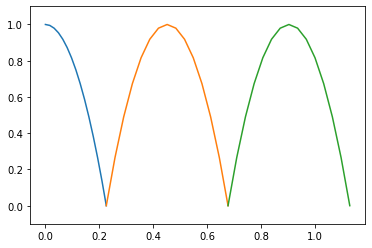

In [137]:
t = linspace(0,t_suelo,15)
plot(tray.sol(t)[0],tray.sol(t)[1])
#primer rebote
ci = tray.sol(t_suelo)
ci[3] = -ci[3]
tray = solve_ivp(caida,(0,tf),ci,dense_output=True,atol=1e-8,rtol=1e-8)
t_suelo = suelo_newton(1.1*t_suelo,tray.sol)
print(t_suelo)
t = linspace(0,t_suelo,15)
plot(tray.sol(t)[0],tray.sol(t)[1])
#segundo rebote
ci = tray.sol(t_suelo)
ci[3] = -ci[3]
tray = solve_ivp(caida,(0,tf),ci,dense_output=True,atol=1e-8,rtol=1e-8)
t_suelo = suelo_newton(1.1*t_suelo,tray.sol)
print(t_suelo)
t = linspace(0,t_suelo,15)
plot(tray.sol(t)[0],tray.sol(t)[1])

ylim([-0.1,1.1])
show()